## Importing Library

In [1]:
!pip install -U scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import joblib




2025-06-14 14:15:27.170448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749910527.356153      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749910527.420144      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
df.head(14)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
df.shape

(299, 13)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: ylabel='Frequency'>

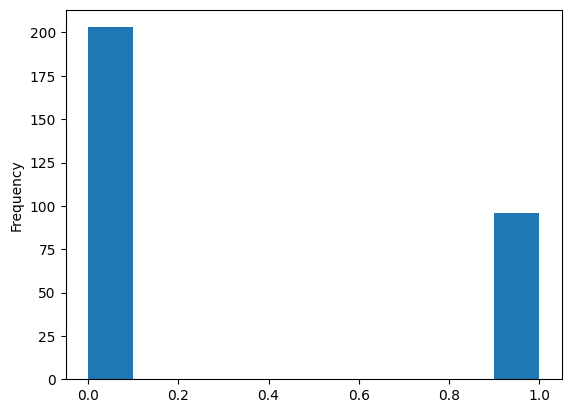

In [9]:
df['DEATH_EVENT'].plot(kind='hist')

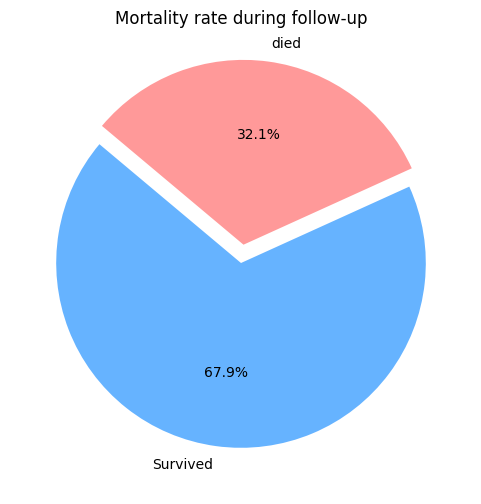

In [10]:
death_counts = df["DEATH_EVENT"].value_counts()
labels = ['Survived', 'died']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(death_counts, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=(0, 0.1))
plt.title("Mortality rate during follow-up")
plt.show()

## *EDA*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

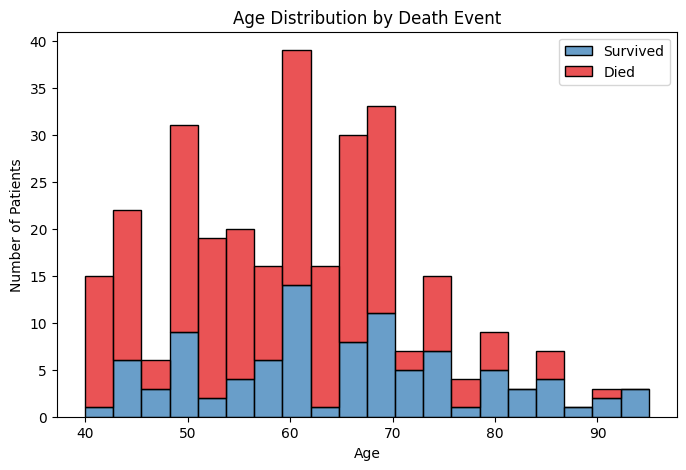

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="age", hue="DEATH_EVENT", multiple="stack", bins=20, palette="Set1")
plt.title("Age Distribution by Death Event")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.legend(["Survived", "Died"])
plt.show()


Number of deaths = minority:

* Approximately 32% of patients died during follow-up.

* This means the data are slightly unbalanced.

Age has a clear influence:

* Older patients appear to have a higher probability of dying during follow-up.


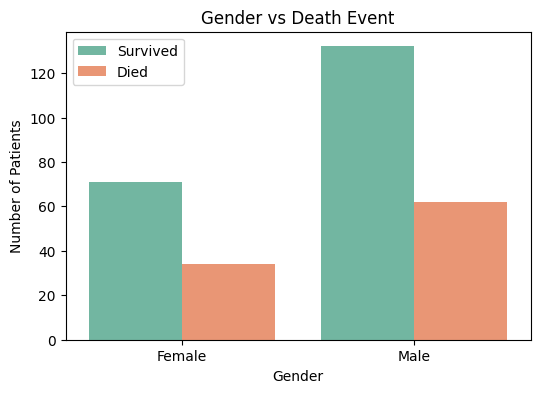

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex", hue="DEATH_EVENT", palette="Set2")
plt.title("Gender vs Death Event")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(["Survived", "Died"])
plt.show()


In [13]:
df.groupby('DEATH_EVENT')['sex'].value_counts()


DEATH_EVENT  sex
0            1      132
             0       71
1            1       62
             0       34
Name: count, dtype: int64

It seems that most of the deceased were female.

In [14]:
df.groupby('DEATH_EVENT').value_counts().sum()

299

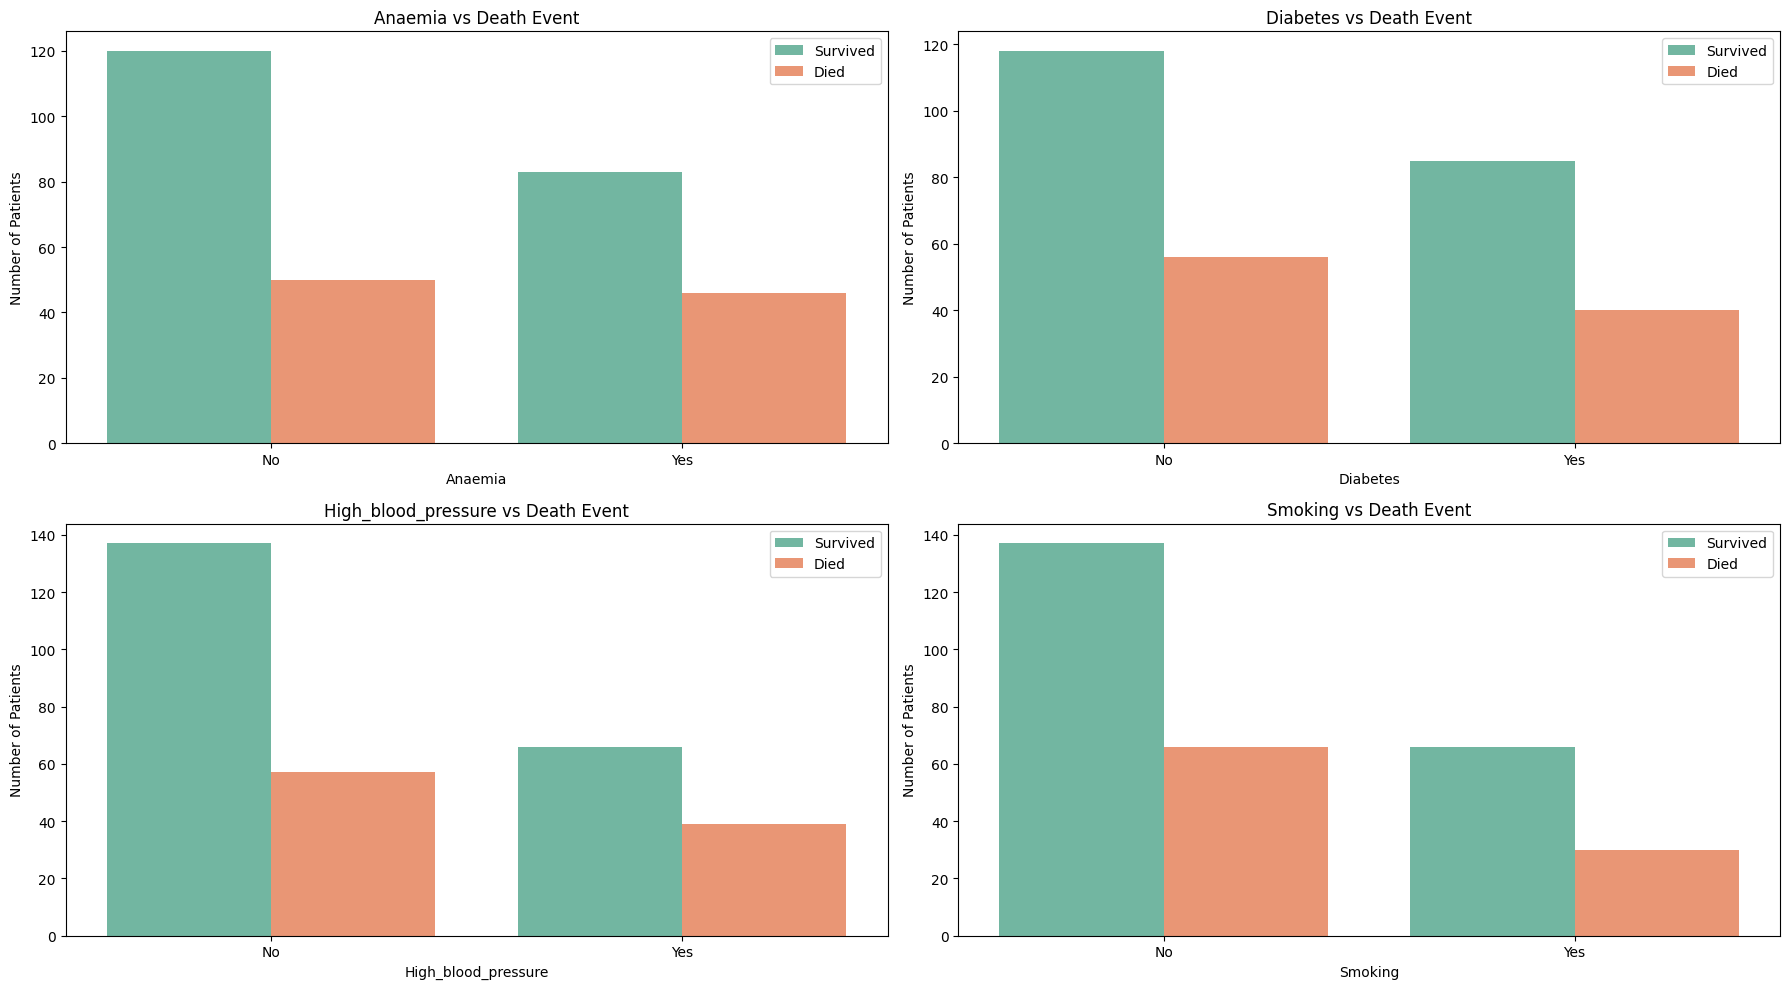

In [15]:
cat_features = ["anaemia", "diabetes", "high_blood_pressure", "smoking"]

plt.figure(figsize=(18, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=feature, hue="DEATH_EVENT", palette="Set2")
    plt.title(f"{feature.capitalize()} vs Death Event")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Number of Patients")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.legend(["Survived", "Died"])

plt.tight_layout()
plt.show()


In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
df['high_blood_pressure'].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

In [18]:
df['time'].value_counts()

time
187    7
250    7
186    6
107    6
10     6
      ..
105    1
106    1
86     1
96     1
110    1
Name: count, Length: 148, dtype: int64

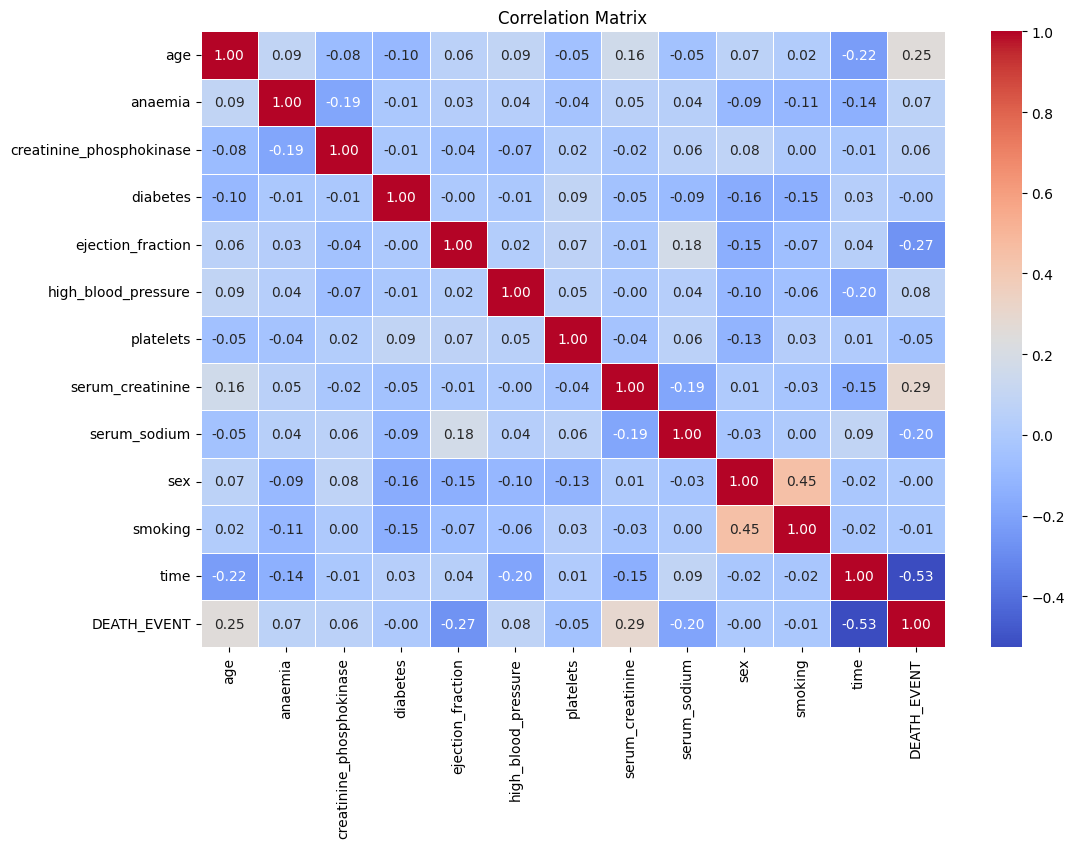

In [19]:
corr_matrix = df.corr()

# رسم heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

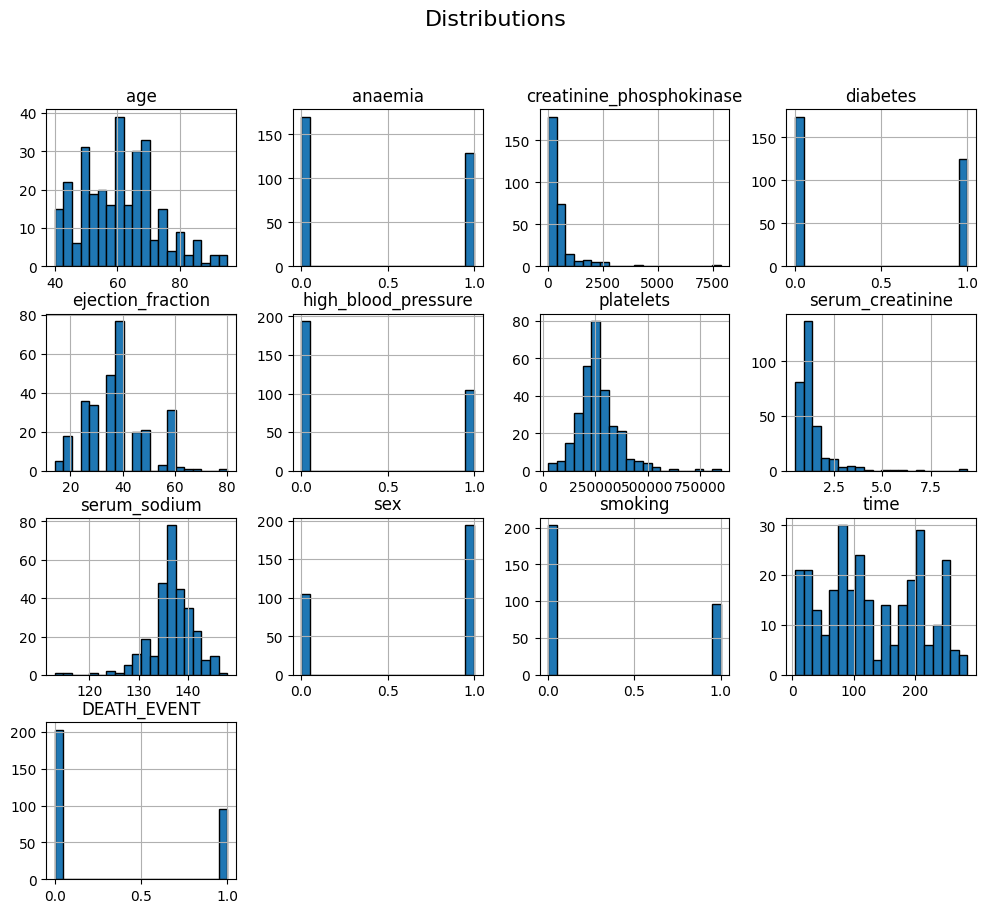

In [20]:
# Distributions
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distributions', fontsize=16)
plt.show()


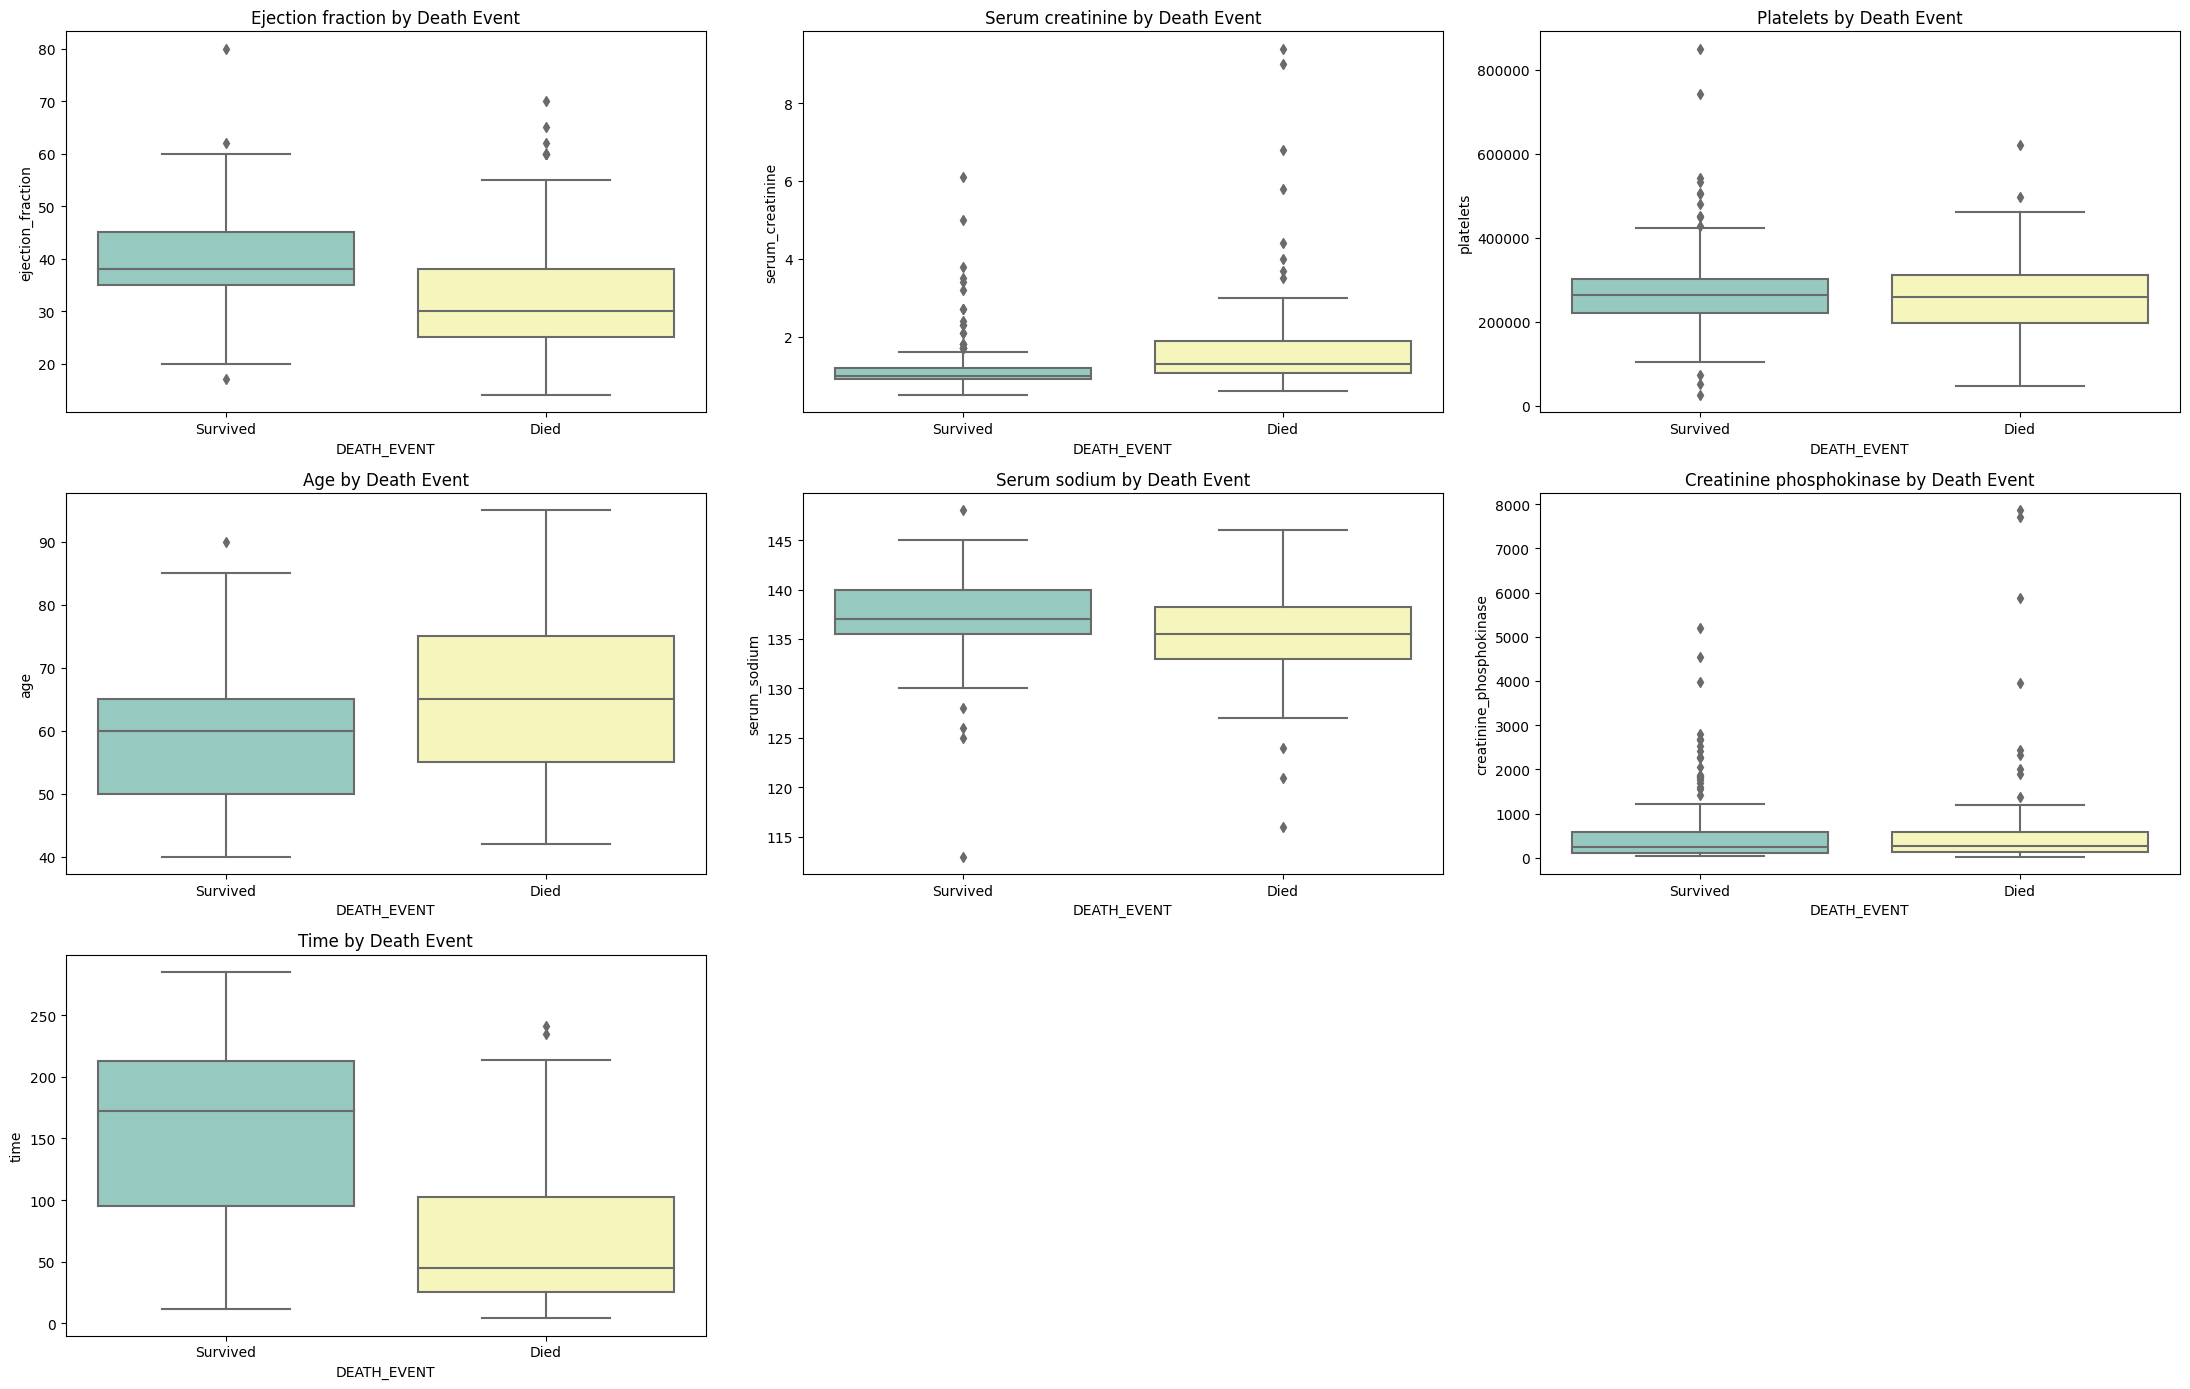

In [21]:
cont_features = [
    "ejection_fraction", "serum_creatinine", "platelets",
    "age", "serum_sodium", "creatinine_phosphokinase", "time"
]

plt.figure(figsize=(22, 14))
for i, feature in enumerate(cont_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x="DEATH_EVENT", y=feature, palette="Set3")
    plt.title(f"{feature.replace('_', ' ').capitalize()} by Death Event")
    plt.xticks([0, 1], ['Survived', 'Died'])

plt.tight_layout()
plt.show()


the heatmap appear that not correlation between  Death Event and Time but boxplot appear that the mean that the patiant died in it far from the mean that the patient is survived in it


# Handling Outliers

In [22]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return df

cols_with_outliers = ['serum_creatinine', 'creatinine_phosphokinase', 'platelets']

for col in cols_with_outliers:
    df = cap_outliers(df, col)


In [23]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20,0,327000.00,2.15,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38,0,140000.00,1.40,140,1,1,280,0


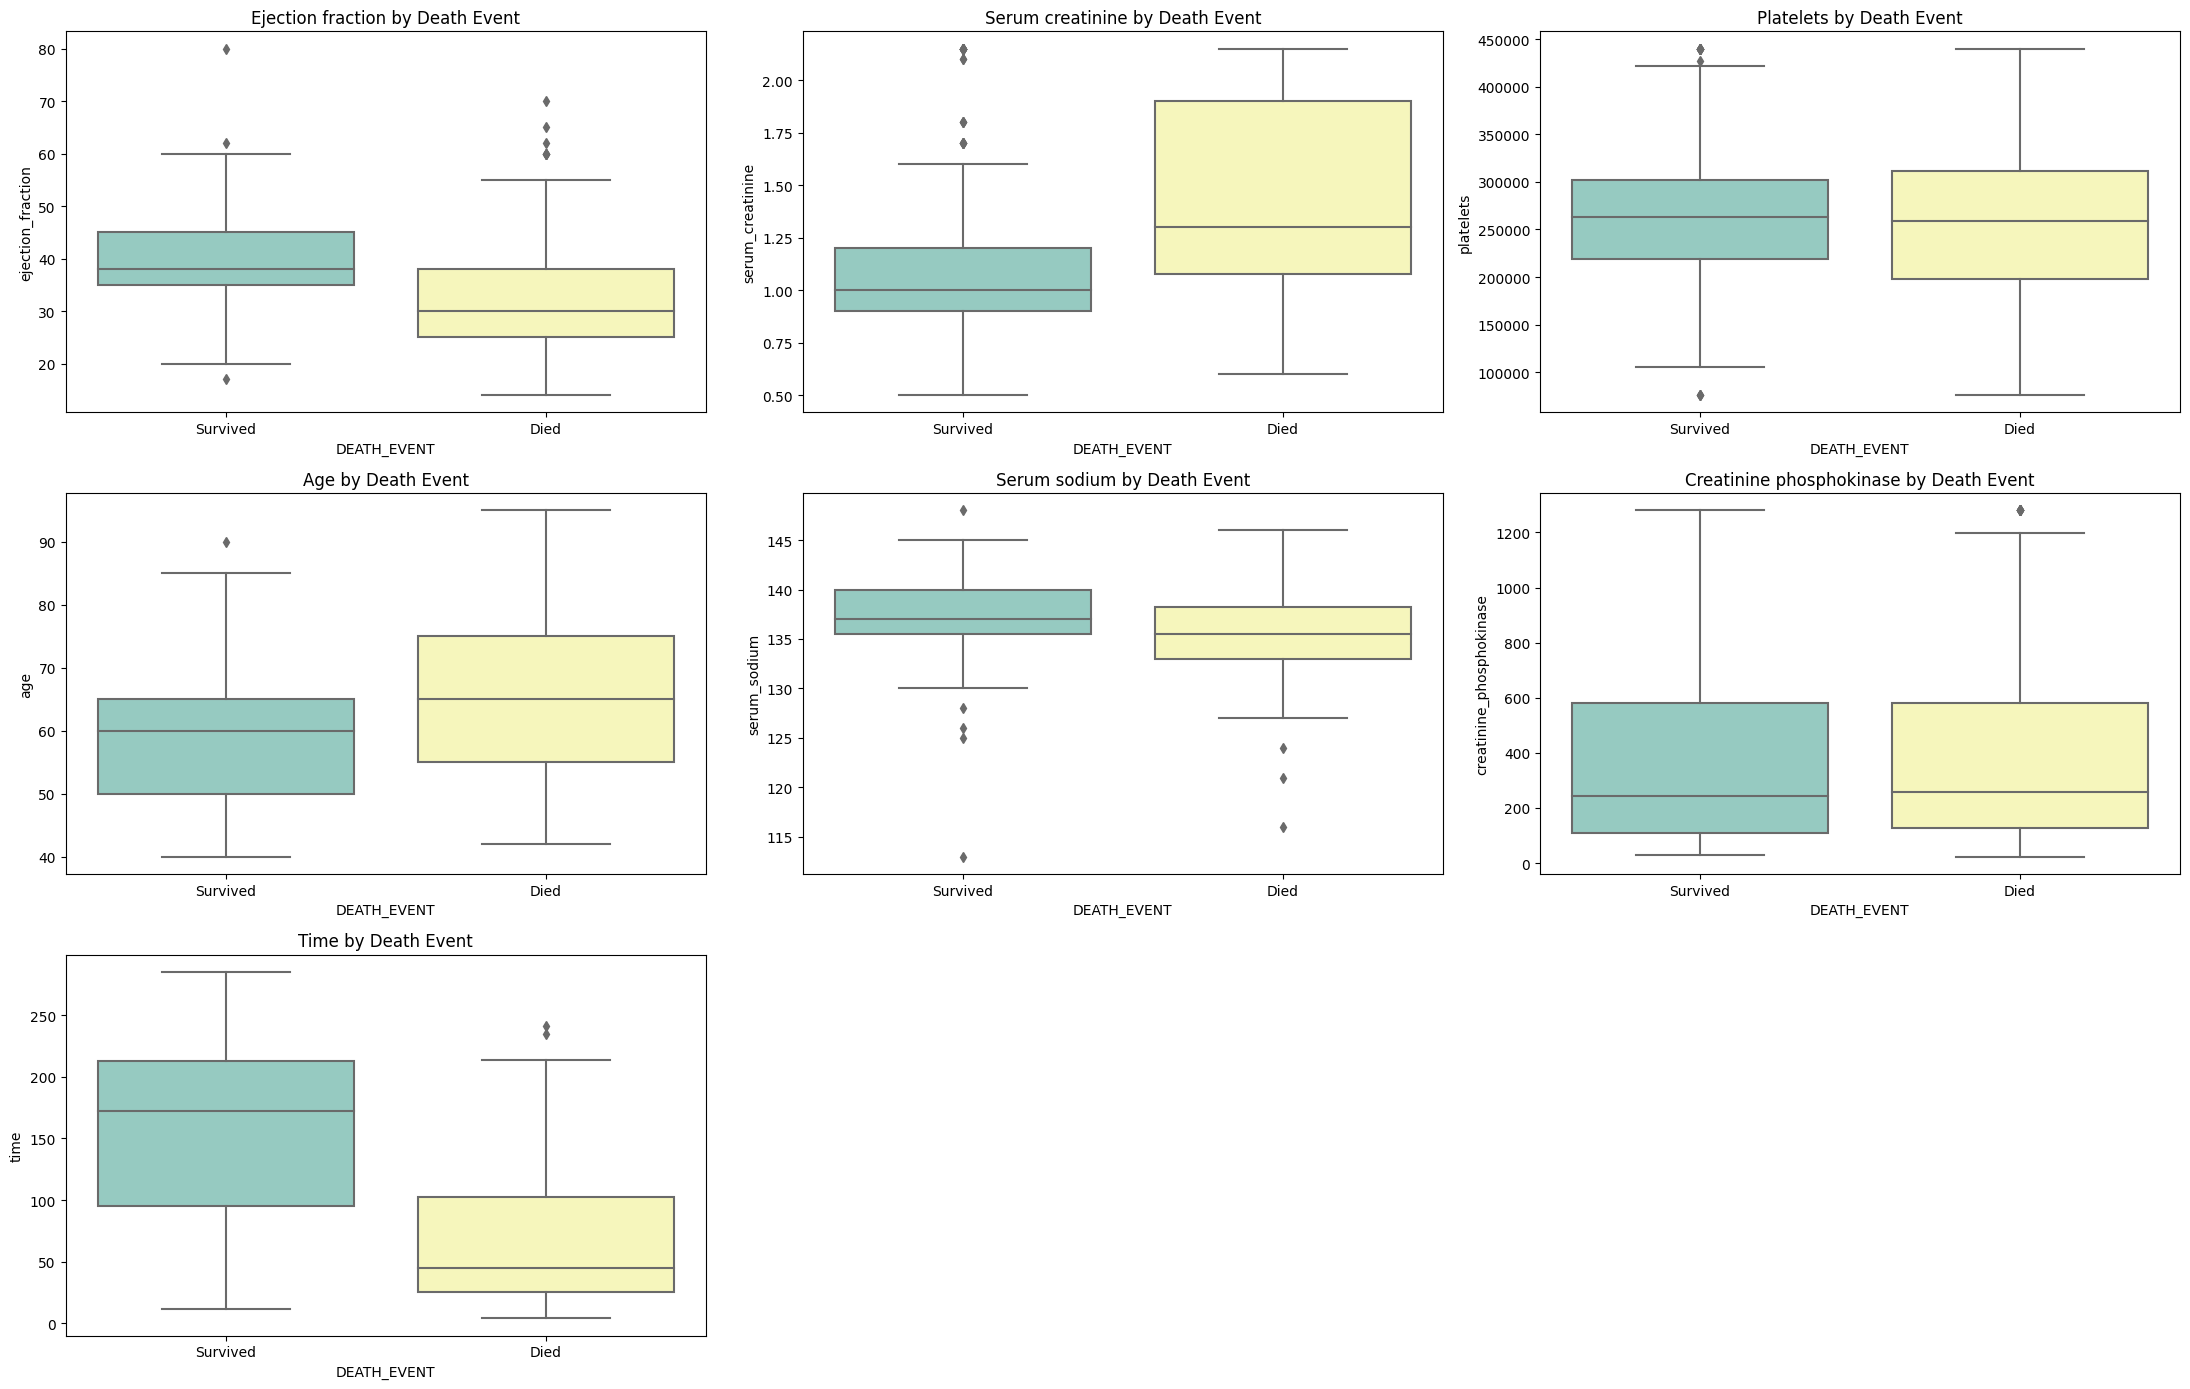

In [24]:
cont_features = [
    "ejection_fraction", "serum_creatinine", "platelets",
    "age", "serum_sodium", "creatinine_phosphokinase", "time"
]

plt.figure(figsize=(22, 14))
for i, feature in enumerate(cont_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x="DEATH_EVENT", y=feature, palette="Set3")
    plt.title(f"{feature.replace('_', ' ').capitalize()} by Death Event")
    plt.xticks([0, 1], ['Survived', 'Died'])

plt.tight_layout()
plt.show()


## spliting data

In [25]:
x =df.drop('DEATH_EVENT' , axis=1)
y =df['DEATH_EVENT']

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [27]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((239, 12), (60, 12), (239,), (60,))

In [28]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


# balancing data 

In [29]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

<Axes: ylabel='Frequency'>

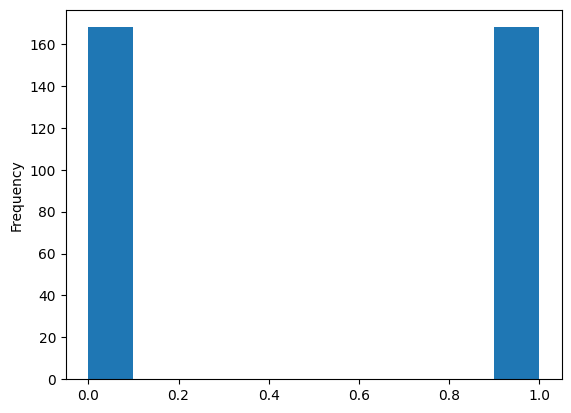

In [30]:
y_train.plot(kind='hist')

In [31]:
y_train.value_counts()

DEATH_EVENT
1    168
0    168
Name: count, dtype: int64

In [32]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((336, 12), (60, 12), (336,), (60,))

In [33]:
y_train.value_counts()

DEATH_EVENT
1    168
0    168
Name: count, dtype: int64

In [34]:
y_test.value_counts()

DEATH_EVENT
0    35
1    25
Name: count, dtype: int64

# Feature Importance

[0.07984225 0.03156882 0.06089349 0.03546815 0.10105355 0.0296785
 0.06940592 0.14033963 0.0721173  0.04848158 0.03413729 0.29701351]


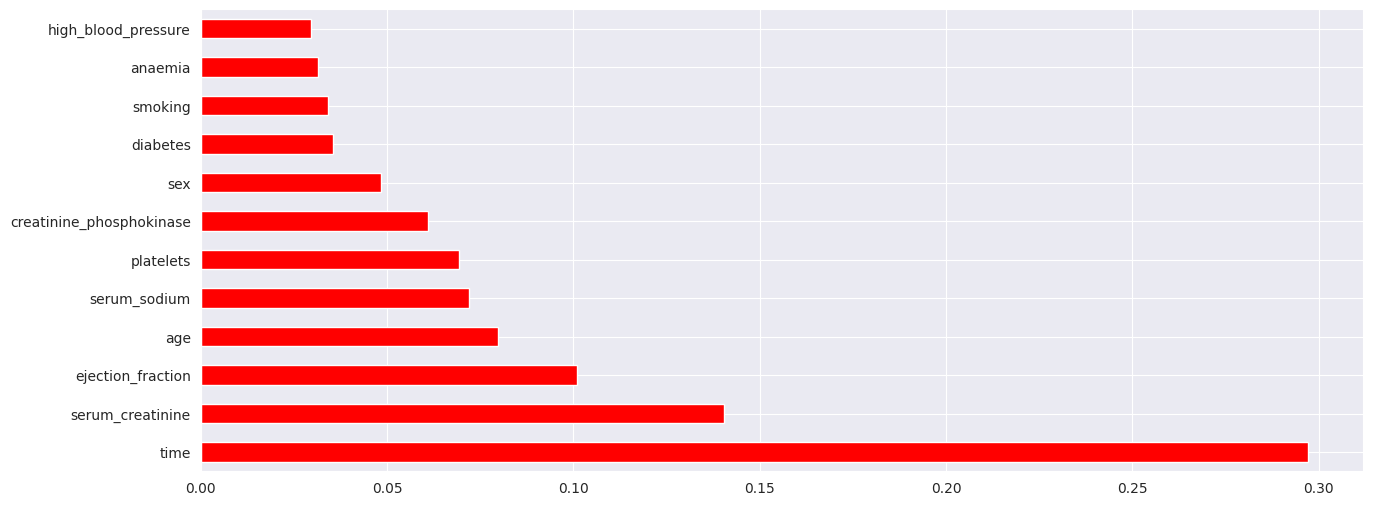

In [35]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(12).plot(kind='barh',color='red')
plt.show()

In [36]:
y_pred = model.predict(x_test)
target_names = ['0',  '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60



In [37]:
x_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [38]:
x_train=x_train[['time','serum_creatinine','ejection_fraction']]

In [39]:
x_test=x_test[['time','serum_creatinine','ejection_fraction']]

In [40]:
x_test.head()

,time,serum_creatinine,ejection_fraction
0,250,2.15,40
1,240,0.90,35
2,129,1.10,30
3,10,2.15,35
4,74,1.20,40


## scalling

In [41]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x_train)

In [42]:
x_train = pd.DataFrame(data_scaled, columns=x_train.columns, index=x_train.index)


In [43]:
x_test_scaled= scaler.transform(x_test)

In [44]:
x_test=pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

In [45]:
x_test.head()

,time,serum_creatinine,ejection_fraction
0,1.755437,1.984710,0.271699
1,1.627049,-0.937834,-0.160140
2,0.201943,-0.470227,-0.591979
3,-1.325872,1.984710,-0.160140
4,-0.504190,-0.236424,0.271699


## models

In [46]:
models ={
    'LogisticRegression' : LogisticRegression(),
    'GaussianNB' : GaussianNB(),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree Classifier': DecisionTreeClassifier( max_depth=13,random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=21, max_depth=10, random_state=42),
    'SVC' : SVC(C=10, gamma=0.0002, kernel='rbf'),
    "XGBClassifier":XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
    'GB': GradientBoostingClassifier( n_estimators=55, learning_rate=0.05 , n_iter_no_change=5,validation_fraction=0.20,random_state=42 ),
    'xgb_model':xgb.XGBClassifier( n_estimators=55,random_state=42)
    
}

In [47]:

best_model = None
best_score = 0  
best_model_name = ""

accuracy = []

for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    Recall_test = recall_score(y_test, y_test_pred, average='weighted')
    Precision_test = precision_score(y_test, y_test_pred, average='weighted')
    F1_test = f1_score(y_test, y_test_pred, average='weighted')

    Recall_train = recall_score(y_train, y_train_pred, average='weighted')
    Precision_train = precision_score(y_train, y_train_pred, average='weighted')
    F1_train = f1_score(y_train, y_train_pred, average='weighted')

  
    if Recall_test > best_score:
        best_score = Recall_test
        best_model = model
        best_model_name = model_name

    accuracy.append([
        model_name, acc_train, acc_test,
        Recall_train, Recall_test,
        Precision_train, Precision_test,
        F1_train, F1_test
    ])


df_results = pd.DataFrame(accuracy, columns=[
    "Model", "Accuracy_train", "Accuracy_test",
    "Recall_train", "Recall_test",
    "Precision_train", "Precision_test",
    "F1_train", "F1_test"
], index=models.keys())

df_results.sort_values(by='Recall_test', ascending=False)


# joblib.dump(best_model, f'best_model_{best_model_name}.joblib')

,Model,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
KNN Classifier,KNN Classifier,0.922619,0.816667,0.922619,0.816667,0.923159,0.815972,0.922594,0.816087
xgb_model,xgb_model,0.994048,0.800000,0.994048,0.800000,0.994118,0.799060,0.994047,0.798611
XGBClassifier,XGBClassifier,1.000000,0.800000,1.000000,0.800000,1.000000,0.799060,1.000000,0.798611
GB,GB,0.916667,0.783333,0.916667,0.783333,0.916726,0.782407,0.916664,0.782648
Random Forest Classifier,Random Forest Classifier,0.997024,0.766667,0.997024,0.766667,0.997041,0.765178,0.997024,0.765046
LogisticRegression,LogisticRegression,0.854167,0.733333,0.854167,0.733333,0.854179,0.737374,0.854165,0.734540
GaussianNB,GaussianNB,0.860119,0.733333,0.860119,0.733333,0.860438,0.737374,0.860088,0.734540
Decision Tree Classifier,Decision Tree Classifier,1.000000,0.733333,1.000000,0.733333,1.000000,0.731297,1.000000,0.731481
SVC,SVC,0.854167,0.716667,0.854167,0.716667,0.854280,0.723586,0.854155,0.718342


In [48]:
df_results.sort_values(by='Recall_test', ascending=False)

,Model,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
KNN Classifier,KNN Classifier,0.922619,0.816667,0.922619,0.816667,0.923159,0.815972,0.922594,0.816087
xgb_model,xgb_model,0.994048,0.800000,0.994048,0.800000,0.994118,0.799060,0.994047,0.798611
XGBClassifier,XGBClassifier,1.000000,0.800000,1.000000,0.800000,1.000000,0.799060,1.000000,0.798611
GB,GB,0.916667,0.783333,0.916667,0.783333,0.916726,0.782407,0.916664,0.782648
Random Forest Classifier,Random Forest Classifier,0.997024,0.766667,0.997024,0.766667,0.997041,0.765178,0.997024,0.765046
LogisticRegression,LogisticRegression,0.854167,0.733333,0.854167,0.733333,0.854179,0.737374,0.854165,0.734540
GaussianNB,GaussianNB,0.860119,0.733333,0.860119,0.733333,0.860438,0.737374,0.860088,0.734540
Decision Tree Classifier,Decision Tree Classifier,1.000000,0.733333,1.000000,0.733333,1.000000,0.731297,1.000000,0.731481
SVC,SVC,0.854167,0.716667,0.854167,0.716667,0.854280,0.723586,0.854155,0.718342


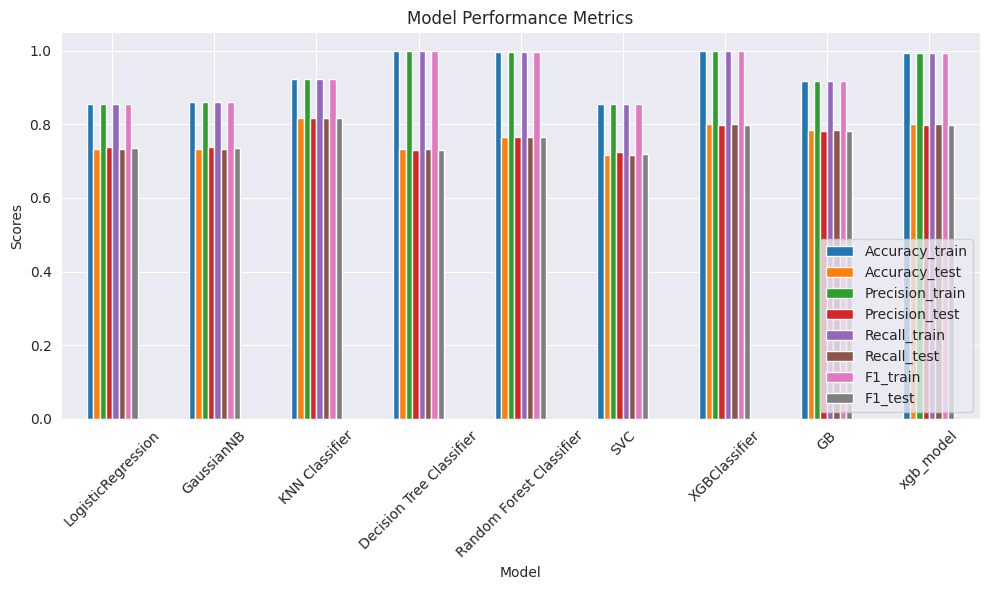

In [49]:
df_results.plot(x='Model', y=['Accuracy_train', 'Accuracy_test', 'Precision_train', 'Precision_test', 'Recall_train', 'Recall_test', 'F1_train', 'F1_test'], kind='bar', figsize=(10, 6))
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


==================== LogisticRegression ====================


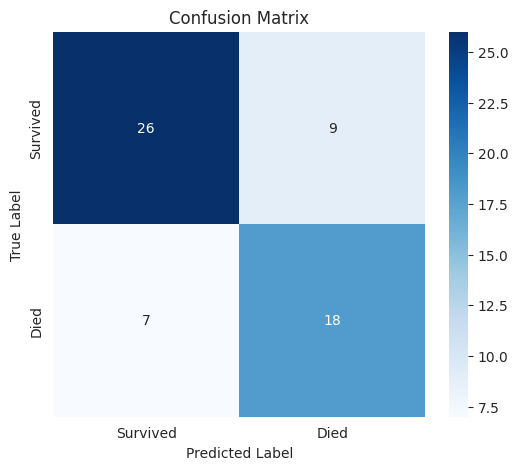


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.67      0.72      0.69        25

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

[[26  9]
 [ 7 18]]

==================== GaussianNB ====================


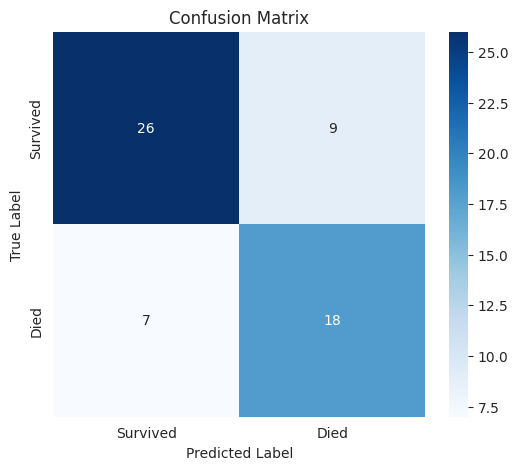


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.67      0.72      0.69        25

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

[[26  9]
 [ 7 18]]

==================== KNN Classifier ====================


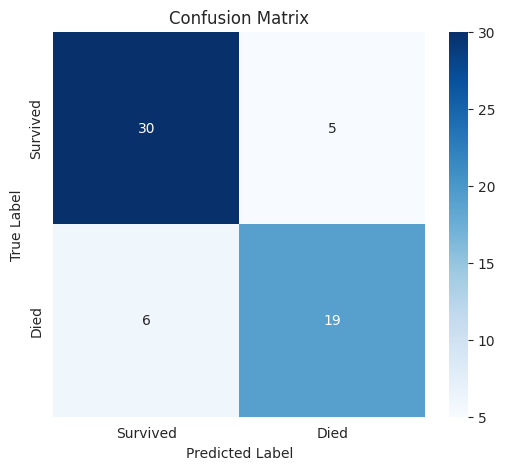


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.79      0.76      0.78        25

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60

[[30  5]
 [ 6 19]]

==================== Decision Tree Classifier ====================


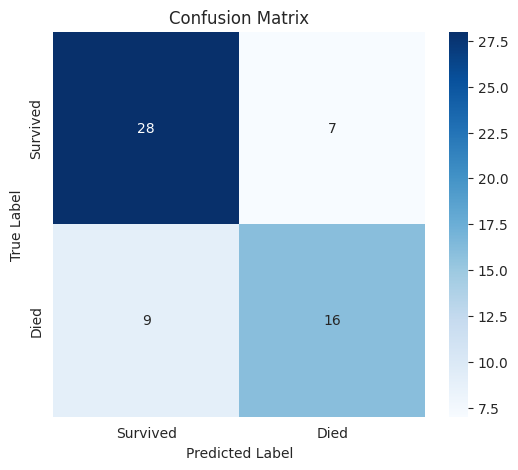


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.70      0.64      0.67        25

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.73      0.73        60

[[28  7]
 [ 9 16]]

==================== Random Forest Classifier ====================


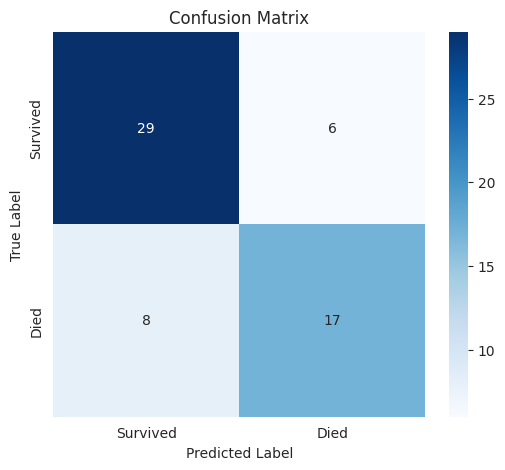


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.74      0.68      0.71        25

    accuracy                           0.77        60
   macro avg       0.76      0.75      0.76        60
weighted avg       0.77      0.77      0.77        60

[[29  6]
 [ 8 17]]

==================== SVC ====================


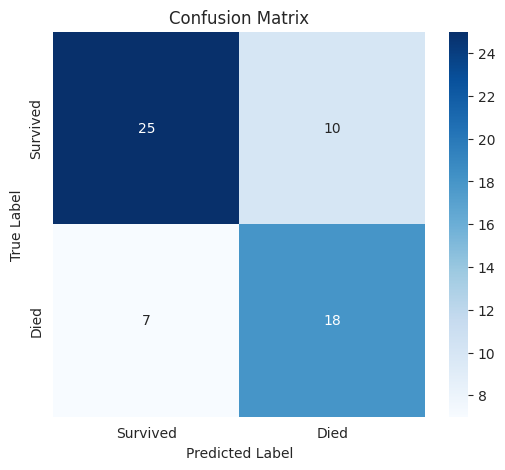


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.75        35
           1       0.64      0.72      0.68        25

    accuracy                           0.72        60
   macro avg       0.71      0.72      0.71        60
weighted avg       0.72      0.72      0.72        60

[[25 10]
 [ 7 18]]

==================== XGBClassifier ====================


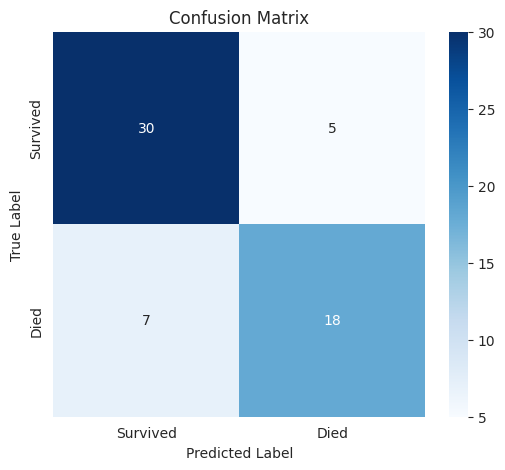


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.78      0.72      0.75        25

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60

[[30  5]
 [ 7 18]]

==================== GB ====================


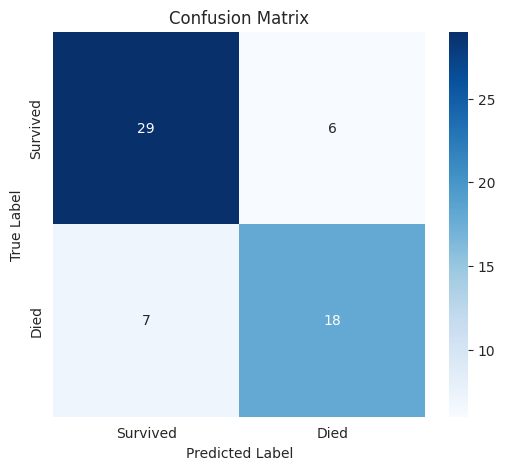


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.75      0.72      0.73        25

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.78        60
weighted avg       0.78      0.78      0.78        60

[[29  6]
 [ 7 18]]

==================== xgb_model ====================


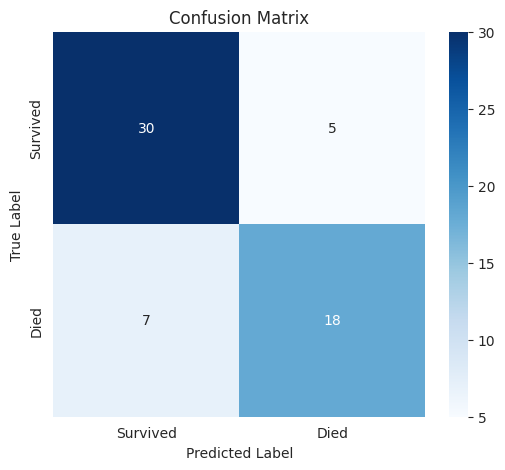


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.78      0.72      0.75        25

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60

[[30  5]
 [ 7 18]]


In [50]:
for name, model in models.items():
    print(f"\n==================== {name} ====================")

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)




    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Survived", "Died"],
    yticklabels=["Survived", "Died"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))
    print(cm)



## Neural network

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

In [52]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [53]:
x_train=x_train[['time','serum_creatinine','ejection_fraction']]
x_test=x_test[['time','serum_creatinine','ejection_fraction']]

In [54]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train_scaled, columns=['time','serum_creatinine','ejection_fraction'])
x_train


,time,serum_creatinine,ejection_fraction
0,0.917167,-0.513224,-1.161762
1,-0.866991,-0.044003,-1.161762
2,0.865825,-0.278614,-0.295518
3,-1.329076,-0.513224,1.003848
4,-1.534447,-0.747834,-0.035644
...,...,...,...
204,0.493590,-0.513224,0.137604
205,-0.802813,-0.747834,-0.295518
206,-0.584607,0.190607,0.570726
207,1.417759,0.894437,-0.728640


In [55]:
x_test = scaler.transform(x_test)

x_test = pd.DataFrame(x_test, columns=x_train.columns)

x_test


,time,serum_creatinine,ejection_fraction
0,1.494773,2.184792,0.137604
1,1.366416,-0.747834,-0.295518
2,-0.058344,-0.278614,-0.728640
3,-1.585789,2.184792,-0.295518
4,-0.764306,-0.044003,0.137604
...,...,...,...
85,-0.340729,-0.090925,0.137604
86,-0.789977,-0.513224,-0.295518
87,-1.547282,0.190607,1.003848
88,-1.585789,2.184792,-0.035644


In [56]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_tes= x_test.to_numpy()
y_tes = y_test.to_numpy()

In [57]:
# splinting data to train and eval
x_test, x_eval, y_test, y_eval = train_test_split(
    x_tes, y_tes, test_size=0.5, random_state=42
)

In [58]:
x_test.shape , x_eval.shape , y_test.shape , y_eval.shape

((45, 3), (45, 3), (45,), (45,))

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749910551.345830      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [60]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [61]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_eval, y_eval),
    epochs=10,
    batch_size=15
)

Epoch 1/10


I0000 00:00:1749910554.406159      74 service.cc:148] XLA service 0x78fb9c00a740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749910554.406679      74 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749910554.666372      74 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/14 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5333 - loss: 0.7191

I0000 00:00:1749910555.662678      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.6748 - loss: 0.6605 - val_accuracy: 0.6889 - val_loss: 0.5976
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7832 - loss: 0.5885 - val_accuracy: 0.7111 - val_loss: 0.5527
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.5022 - val_accuracy: 0.6889 - val_loss: 0.5126
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8286 - loss: 0.4493 - val_accuracy: 0.7111 - val_loss: 0.4943
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7543 - loss: 0.4741 - val_accuracy: 0.6889 - val_loss: 0.4691
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8054 - loss: 0.4408 - val_accuracy: 0.6889 - val_loss: 0.4533
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8003 - loss: 0.3935 - val_accuracy: 0.6889 - val_loss: 0.4446
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8204 - loss: 0.3958 - val_accuracy: 0.6889 - val_loss: 0.4490
E

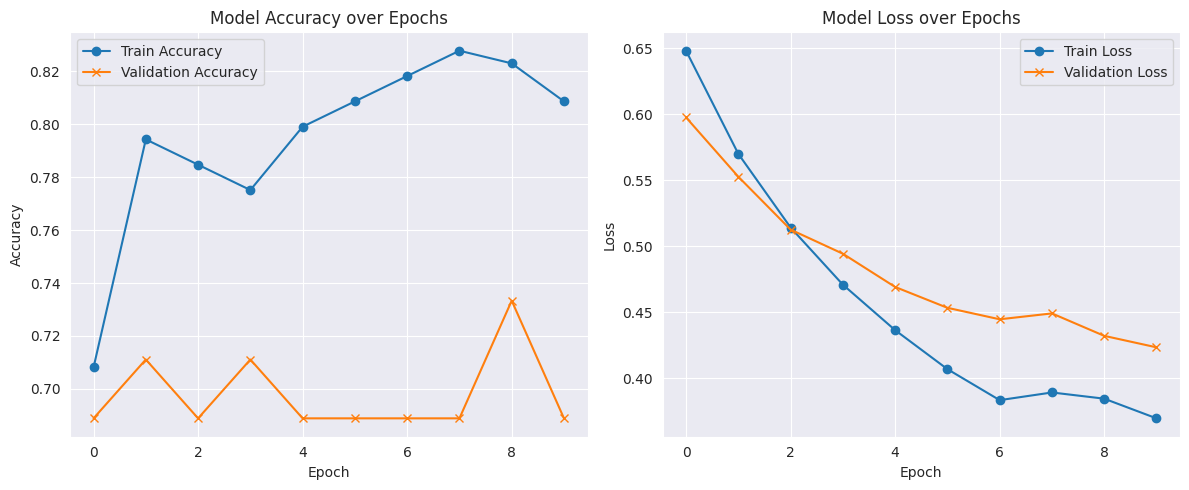

In [62]:
# ===  Accuracy ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# ===  Loss ===
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [63]:
def evaluate_model(model, x, y, name=""):
    preds = np.round(model.predict(x)).astype("int32")
    acc = accuracy_score(y, preds)

    print(f"\n{name} Accuracy:", acc)
    print("Confusion Matrix:")
    print(confusion_matrix(y, preds))
    print("Classification Report:")
    print(classification_report(y, preds))


In [64]:
evaluate_model(model, x_train, y_train, "Train")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Train Accuracy: 0.8421052631578947
Confusion Matrix:
[[132  18]
 [ 15  44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       150
           1       0.71      0.75      0.73        59

    accuracy                           0.84       209
   macro avg       0.80      0.81      0.81       209
weighted avg       0.84      0.84      0.84       209



In [65]:
evaluate_model(model, x_eval, y_eval, "Validation")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step

Validation Accuracy: 0.6888888888888889
Confusion Matrix:
[[25  5]
 [ 9  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.55      0.40      0.46        15

    accuracy                           0.69        45
   macro avg       0.64      0.62      0.62        45
weighted avg       0.67      0.69      0.67        45



In [66]:
evaluate_model(model, x_test, y_test, "Test")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Test Accuracy: 0.7777777777777778
Confusion Matrix:
[[18  5]
 [ 5 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.77      0.77      0.77        22

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

